# Week 7 Lab: Text Analytics

<img align="right" style="padding-right:10px;" src="figures_wk7/topic_modeling.png" width=400><br>

This week's assignment will focus on text analysis of BBC News articles.

## Our Dataset: 
**Dataset:** bbc.csv(Provided in folder assign_wk7)<br>
Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005. <br>
Class Labels: 5 (business, entertainment, politics, sport, tech)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set() 

In [2]:
news = pd.read_csv('assign_wk7/bbc.csv', header=0, usecols=[1,2], names=['raw_text', 'target_names'])
news.head(10)

,raw_text,target_names
0,UK economy facing 'major risks'\n \n The UK ma...,business
1,Aids and climate top Davos agenda\n \n Climate...,business
2,Asian quake hits European shares\n \n Shares i...,business
3,India power shares jump on debut\n \n Shares i...,business
4,Lacroix label bought by US firm\n \n Luxury go...,business
5,Insurance bosses plead guilty\n \n Another thr...,business
6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business
7,Parmalat to return to stockmarket\n \n Parmala...,business
8,WorldCom director admits lying\n \n The former...,business
9,Ebbers denies WorldCom fraud\n \n Former World...,business


## Text Analytics Lab

**Objective:** 
To demostrate all of the text analysis techniques covered int his week's lecture material.

## Preparation of the text data for analysis
       * Elimination of stopwords, punctuation, digits, lowercase

In [3]:
news.target_names.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: target_names, dtype: int64

In [4]:
print(news.raw_text[3])

India power shares jump on debut
 
 Shares in India's largest power producer, National Thermal Power Corp (NTPC) have risen 13% on their stock market debut.
 
 The government's partial sell-off of NTPC is part of a controversial programme to privatise state-run firms. The 865 million share offer, a mix of new shares and sales by the government, raised 54bn rupees($1.2bn). It was India's second $1bn stock debut in three months, coming after the flotation by software firm Tata. The share offer was eleven times oversubscribed. "It is a good investment bet," said Suhas Naik, an investment analyst from ING Mutual Fund. "Power needs in India are set to rise and NTPC will benefit from that." Analysts say the success of the NTPC flotation would encourage the government to reduce stakes in more power companies. NTPC has said it will use the money from the share sale to feed the growing needs of the country's energy-starved economy. The firm is the largest utility company in India, and the sixth

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(news['target_names'])
news['target'] = le.transform(news['target_names'])

In [6]:
news['target_names'] = le.inverse_transform(news['target'])

In [7]:
news.to_csv('assign_wk7/bbc_renamed.csv', header=True, index=False)

In [8]:
df = pd.read_csv('assign_wk7/bbc_renamed.csv')
df

,raw_text,target_names,target
0,UK economy facing 'major risks'\n \n The UK ma...,business,0
1,Aids and climate top Davos agenda\n \n Climate...,business,0
2,Asian quake hits European shares\n \n Shares i...,business,0
3,India power shares jump on debut\n \n Shares i...,business,0
4,Lacroix label bought by US firm\n \n Luxury go...,business,0
...,...,...,...
2220,Warning over Windows Word files\n \n Writing a...,tech,4
2221,Fast lifts rise into record books\n \n Two hig...,tech,4
2222,Nintendo adds media playing to DS\n \n Nintend...,tech,4
2223,Fast moving phone viruses appear\n \n Security...,tech,4


In [9]:
df['word_cnt'] = df.raw_text.apply(lambda x: len(str(x).split(" ")))

In [10]:
df['char_cnt'] = df.raw_text.str.len()

In [11]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df.raw_text.apply(lambda x: len([x for x in x.split() if x in stop]))

In [12]:
df['clean_text'] = df.raw_text.apply(lambda x: " ".join(x.lower() for x in x.split()))

In [13]:
df['clean_text'] = df.clean_text.str.replace('\S+@\S+','') #looking for the case of XXXX@XXXX
df['clean_text'] = df.clean_text.str.replace('http\S+','') #looking for http or https web addresses
df['clean_text'] = df.clean_text.str.replace('\S+.com','') #looking for email addresses that end in '.com'
df['clean_text'] = df.clean_text.str.replace('\S+.edu','') #looking for email addresses that end in '.edu'

In [14]:
df['clean_text'] = df.clean_text.str.replace('[^\w\s]', '')

In [15]:
df['clean_text'] = df.clean_text.str.replace('\d+', '')

In [16]:
from nltk.corpus import stopwords, words
stop = stopwords.words('english')
df['clean_text'] = df.clean_text.apply(lambda x: " ".join(w for w in x.split() if w not in stop))

In [17]:
df.head()

,raw_text,target_names,target,word_cnt,char_cnt,stopwords,clean_text
0,UK economy facing 'major risks'\n \n The UK ma...,business,0,329,1996,112,uk economy facing major risks uk manufacturing...
1,Aids and climate top Davos agenda\n \n Climate...,business,0,454,2727,161,aids climate top davos agenda climate change f...
2,Asian quake hits European shares\n \n Shares i...,business,0,553,3444,171,asian quake hits european shares shares europe...
3,India power shares jump on debut\n \n Shares i...,business,0,175,1038,55,india power shares jump debut shares indias la...
4,Lacroix label bought by US firm\n \n Luxury go...,business,0,152,894,47,lacroix label bought us firm luxury goods grou...


## Identify the 10 most frequently used words in the text
       * How about the ten least frequently used words? 
       * How does lemmatization change the most/least frequent words?
           - Explain and demonstrate this topic

In [18]:
import nltk

freq = freq = pd.Series(' '.join(df.clean_text).split()).value_counts().to_dict() 

top_10 = list(freq.items())[:10]
bottom_10 = list(freq.items())[-10:]

print("The 10 most frequently used words in the text are: \n\n" + str(top_10))

print("\n The 10 least frequently used words in the text are: \n\n" + str(bottom_10))

The 10 most frequently used words in the text are: 

[('said', 7244), ('mr', 3004), ('would', 2554), ('also', 2141), ('people', 1954), ('new', 1942), ('us', 1901), ('one', 1733), ('year', 1628), ('could', 1505)]

 The 10 least frequently used words in the text are: 

[('aniston', 1), ('joeys', 1), ('dispossessed', 1), ('sixyearrun', 1), ('nephew', 1), ('phoebe', 1), ('butlersloss', 1), ('rotten', 1), ('thirteen', 1), ('mu', 1)]


1 letter words are no friend of mine.

In [19]:
df['clean_text'] = df.clean_text.apply(lambda x: " ".join(x for x in x.split() if len(x) > 1))

freq = pd.Series(' '.join(df.clean_text).split()).value_counts().to_dict()
bottom_10 = list(freq.items())[-10:]
print("The 10 least frequently used words in the text are: \n\n" + str(bottom_10))

The 10 least frequently used words in the text are: 

[('tysabritreated', 1), ('restating', 1), ('leukoencephalopathy', 1), ('areconsulting', 1), ('multifocal', 1), ('idecs', 1), ('irelandbased', 1), ('shihabeldin', 1), ('adnan', 1), ('mu', 1)]


In [20]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#establish the lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SCULLY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
df['clean_text'] = df.clean_text.apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(w) for w in x.split()))

In [22]:
df['clean_text'] = df.clean_text.apply(lambda x: " ".join(x for x in x.split() if len(x) > 1))

freq = pd.Series(' '.join(df.clean_text).split()).value_counts().to_dict()

top_10 = list(freq.items())[:10]
bottom_10 = list(freq.items())[-10:]
print("The 10 most frequently used words in the text are: \n\n" + str(top_10))
print("\n The 10 least frequently used words in the text are: \n\n" + str(bottom_10))

The 10 most frequently used words in the text are: 

[('said', 7244), ('mr', 3045), ('year', 2851), ('would', 2554), ('also', 2141), ('people', 2029), ('new', 1942), ('one', 1803), ('could', 1505), ('game', 1461)]

 The 10 least frequently used words in the text are: 

[('fuck', 1), ('twat', 1), ('malarkey', 1), ('whittle', 1), ('littman', 1), ('circs', 1), ('swears', 1), ('erica', 1), ('congruent', 1), ('mu', 1)]


Oh wow hahaha.... to be fair 'malarkey' is a great word. At least they are the least frequently used words ... right?

Lemmetization seemed to remove the words that were a combination of two words. This is because it couldn't recognize a base-word for words like "areconsulting" or "butlersloss". 

The most frequent words did not change much except for their notable frequency. Lemmetization detected the word 'years' and converted it to the base-word 'year' before tallying the frequency of the base-word, which caused an increase.

## Generate a world cloud for the text

In [23]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, max_words=200).generate_from_frequencies(freq)

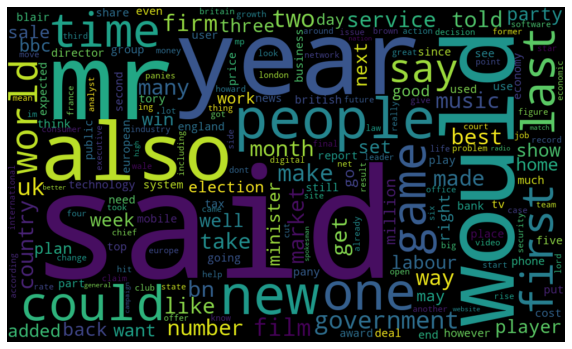

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Demonstrate the generation of n-grams and part of speech tagging

In [25]:
tokens = ' '.join(df.clean_text).split()

In [26]:
ngrams_2 = nltk.bigrams(tokens)

freq_2grams = pd.Series(ngrams_2).value_counts().to_dict()
list(freq_2grams.items())[:20]

[(('last', 'year'), 498),
 (('said', 'mr'), 363),
 (('told', 'bbc'), 347),
 (('mr', 'blair'), 334),
 (('prime', 'minister'), 317),
 (('mr', 'brown'), 256),
 (('chief', 'executive'), 204),
 (('said', 'would'), 193),
 (('last', 'week'), 188),
 (('tony', 'blair'), 186),
 (('mobile', 'phone'), 182),
 (('bbc', 'news'), 178),
 (('general', 'election'), 174),
 (('new', 'york'), 167),
 (('six', 'nation'), 162),
 (('bn', 'bn'), 162),
 (('year', 'ago'), 160),
 (('mr', 'howard'), 159),
 (('liberal', 'democrat'), 156),
 (('number', 'one'), 146)]

In [27]:
ngrams_3 = nltk.trigrams(tokens)

freq_3grams = pd.Series(ngrams_3).value_counts().to_dict()
list(freq_3grams.items())[:20]

[(('told', 'bbc', 'news'), 147),
 (('bbc', 'news', 'website'), 97),
 (('told', 'bbc', 'radio'), 76),
 (('leader', 'michael', 'howard'), 58),
 (('mr', 'blair', 'said'), 54),
 (('million', 'dollar', 'baby'), 52),
 (('radio', 'today', 'programme'), 49),
 (('told', 'bbc', 'sport'), 48),
 (('bbc', 'radio', 'today'), 47),
 (('tory', 'leader', 'michael'), 41),
 (('mr', 'howard', 'said'), 41),
 (('next', 'general', 'election'), 39),
 (('chancellor', 'gordon', 'brown'), 33),
 (('prime', 'minister', 'tony'), 32),
 (('leader', 'charles', 'kennedy'), 32),
 (('minister', 'tony', 'blair'), 32),
 (('digital', 'music', 'player'), 30),
 (('two', 'year', 'ago'), 28),
 (('mr', 'blair', 'told'), 27),
 (('world', 'number', 'one'), 27)]

In [28]:
from nltk.tag import pos_tag

pos_tags = pos_tag(tokens)
pos_tags[:10]

[('uk', 'JJ'),
 ('economy', 'NN'),
 ('facing', 'VBG'),
 ('major', 'JJ'),
 ('risk', 'NN'),
 ('uk', 'IN'),
 ('manufacturing', 'VBG'),
 ('sector', 'NN'),
 ('continue', 'VBP'),
 ('face', 'VBP')]

In [29]:
from collections import Counter

pos_tags = Counter([j for i,j in pos_tag(tokens)])

In [30]:
pos_tags

Counter({'JJ': 90251,
         'NN': 225618,
         'VBG': 19788,
         'IN': 7891,
         'VBP': 14085,
         'CD': 6674,
         'VBD': 34253,
         'NNS': 11796,
         'RBS': 129,
         'RB': 23162,
         'VBN': 12475,
         'VB': 10600,
         'JJS': 2392,
         'JJR': 1764,
         'NNP': 993,
         'RBR': 1051,
         'WP$': 120,
         'MD': 5333,
         'VBZ': 3096,
         'DT': 811,
         'CC': 281,
         'FW': 865,
         'PRP': 250,
         'RP': 387,
         'WP': 69,
         'WRB': 45,
         'WDT': 60,
         'EX': 69,
         'POS': 2,
         'NNPS': 3,
         'PRP$': 15,
         'PDT': 4,
         'TO': 2,
         'UH': 10})

In [31]:
pos_tags_df = pd.DataFrame.from_dict(pos_tags, orient='index', columns=['qty'])
pos_tags_df.to_csv('assign_wk7/pos_tags.csv')

In [32]:
postag = pd.read_csv('assign_wk7/pos_tags.csv', header=0, names=['tag', 'qty'])
most_common_pos = postag.sort_values(by='qty', ascending=False)
mcp = most_common_pos.head(-10)
mcp

,tag,qty
1,NN,225618
0,JJ,90251
6,VBD,34253
9,RB,23162
2,VBG,19788
4,VBP,14085
10,VBN,12475
7,NNS,11796
11,VB,10600
3,IN,7891


In [33]:
least_common_pos = postag.sort_values(by='qty', ascending=True)
lcp = least_common_pos.head(10)
lcp

,tag,qty
28,POS,2
32,TO,2
29,NNPS,3
31,PDT,4
33,UH,10
30,PRP$,15
25,WRB,45
26,WDT,60
27,EX,69
24,WP,69


<AxesSubplot:xlabel='tag', ylabel='qty'>

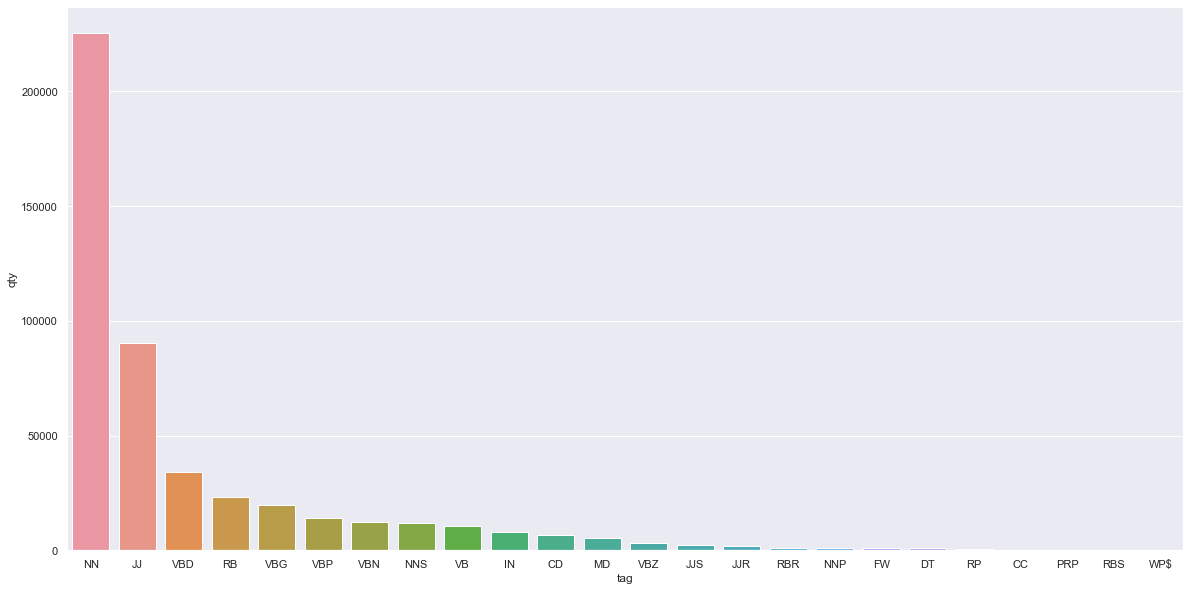

In [34]:
f, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=mcp['tag'], y=mcp['qty'])

NN (singular nouns) are the greatest.

<AxesSubplot:xlabel='tag', ylabel='qty'>

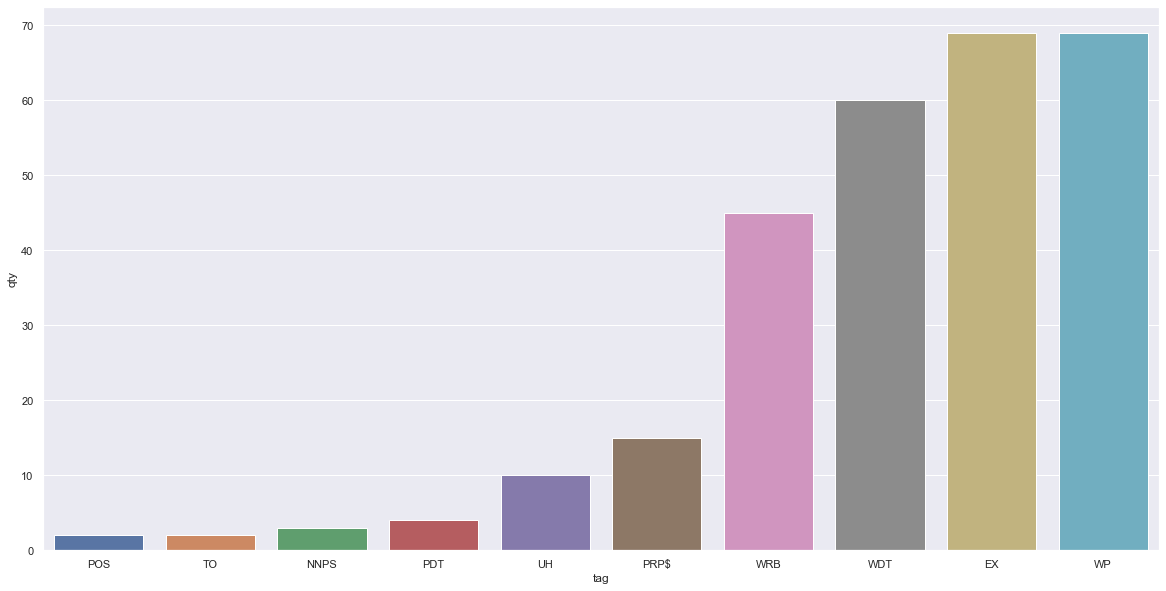

In [35]:
f, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=lcp['tag'], y=lcp['qty'])

The least common parts of speech are tied with POS (possessive ending like "'s") and TO (prepositions or infinitive markers like 'to').

## Create a Topic model of the text
       * Find the optimal number of topics
       * test the accuracy of your model
       * Display your results 2 different ways.
           1) Print the topics and explain any insights at this point.
           2) Graph the topics and explain any insights at this point.


In [36]:
lem_ls = list(df.clean_text.apply(lambda x: list(x.split())))
print(lem_ls[:2])

[['uk', 'economy', 'facing', 'major', 'risk', 'uk', 'manufacturing', 'sector', 'continue', 'face', 'serious', 'challenge', 'next', 'two', 'year', 'british', 'chamber', 'merce', 'bcc', 'said', 'group', 'quarterly', 'survey', 'panies', 'found', 'export', 'picked', 'last', 'three', 'month', 'best', 'level', 'eight', 'year', 'rise', 'came', 'despite', 'exchange', 'rate', 'cited', 'major', 'concern', 'however', 'bcc', 'found', 'whole', 'uk', 'economy', 'still', 'faced', 'major', 'risk', 'warned', 'growth', 'set', 'slow', 'recently', 'forecast', 'economic', 'growth', 'slow', 'little', 'manufacturer', 'domestic', 'sale', 'growth', 'fell', 'back', 'slightly', 'quarter', 'survey', 'firm', 'found', 'employment', 'manufacturing', 'also', 'fell', 'job', 'expectation', 'lowest', 'level', 'year', 'despite', 'positive', 'news', 'export', 'sector', 'worrying', 'sign', 'manufacturing', 'bcc', 'said', 'result', 'reinforce', 'concern', 'sector', 'persistent', 'inability', 'sustain', 'recovery', 'outlook'

BTW: After installing gensim and the dependencies of the library, restart jupyter-notebook or it will not work. 

After issues importing the libraries I found the following solution:

MTKnife from StackOverflow said "My problem apparently was trying to import gensim right after installing it, while Jupyter Notebook was running. Restarting Jupyter and Sypder fixed the problems with both environments." 

Reference: https://stackoverflow.com/questions/61182206/module-smart-open-has-no-attribute-local-file 

In [37]:
import smart_open
import gensim
import gensim.corpora as corpora

In [38]:
id2word = corpora.Dictionary(lem_ls)
corpus = [id2word.doc2bow(post) for post in lem_ls]

And....now we wait

In [39]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [40]:
print(lda_model.print_topics())

[(0, '0.015*"said" + 0.015*"year" + 0.010*"bn" + 0.009*"market" + 0.008*"sale" + 0.006*"firm" + 0.006*"price" + 0.006*"bank" + 0.006*"uk" + 0.006*"growth"'), (1, '0.019*"said" + 0.018*"phone" + 0.012*"mobile" + 0.010*"system" + 0.009*"network" + 0.008*"firm" + 0.008*"people" + 0.007*"service" + 0.007*"could" + 0.007*"software"'), (2, '0.025*"music" + 0.011*"cell" + 0.011*"song" + 0.010*"album" + 0.009*"band" + 0.009*"drug" + 0.009*"pp" + 0.008*"court" + 0.008*"artist" + 0.007*"yukos"'), (3, '0.011*"film" + 0.011*"year" + 0.009*"best" + 0.009*"said" + 0.007*"award" + 0.007*"one" + 0.006*"also" + 0.005*"show" + 0.005*"star" + 0.005*"first"'), (4, '0.020*"spyware" + 0.013*"copy" + 0.012*"dvd" + 0.009*"fa" + 0.008*"pirated" + 0.007*"ripguard" + 0.006*"orchestra" + 0.006*"macrovision" + 0.006*"chart" + 0.005*"pany"'), (5, '0.012*"oscar" + 0.010*"aviator" + 0.009*"best" + 0.009*"actor" + 0.008*"dollar" + 0.008*"actress" + 0.007*"nomination" + 0.006*"film" + 0.006*"ray" + 0.006*"baby"'), (6, 

The top 10 words:

- topic 0: said, year, bn, market, sale, firm, price, bank, growth, share
- topic 1: said, phone, mobile, system, network, firm, could, people, software, service
- topic 2: music, song, album, band, cell, drug, court, artist, pp, yukos
- topic 3: film, year, said, best, one, award, also, show, star, first
- topic 4: spyware, dvd, copy, fa, pirated, riqguard, chart, macrovision, orchestra, osullivan
- topic 5: oscar, aviator, best, actor, dollar, actress, nomination, film, ray, baby
- topic 6: said, mr, would, government, people, party, labour, say, minister, election
- topic 7: said, people, technology, game, user, mr, digital, also, music, mobile
- topic 8: game, said, england, player, win, first, time, back, last, team
- topic 9: evans, ukraine, walmart, fannie, hamm, ossie, mae, borussia, yushchenko, dortmund

In [41]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, 
                                     texts=lem_ls, 
                                     dictionary=id2word, 
                                     coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.507078407675348


A coherence schore of .50 can be better so I will now optimize the base model.

In [42]:
scores = []
for i in range(2,15):
    print(f'Calcuting for {i} topics')
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=i, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
    # compute the coherence score
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=lem_ls, 
                                         dictionary=id2word, 
                                         coherence='c_v')

    # retreive the coherence_scores
    coherence_lda = coherence_model_lda.get_coherence()
    
    scores.append((i,coherence_lda))


Calcuting for 2 topics
Calcuting for 3 topics
Calcuting for 4 topics
Calcuting for 5 topics
Calcuting for 6 topics
Calcuting for 7 topics
Calcuting for 8 topics
Calcuting for 9 topics
Calcuting for 10 topics
Calcuting for 11 topics
Calcuting for 12 topics
Calcuting for 13 topics
Calcuting for 14 topics


In [43]:
scores

[(2, 0.36012557622051056),
 (3, 0.34376659357003775),
 (4, 0.4581386426538785),
 (5, 0.40293895390909357),
 (6, 0.448329903408631),
 (7, 0.4934569426924096),
 (8, 0.49812501043744534),
 (9, 0.4848654306965179),
 (10, 0.5162742843140313),
 (11, 0.4797148479281119),
 (12, 0.503218657218243),
 (13, 0.4973208236121931),
 (14, 0.5194922436809735)]

The best model is of 10 topics.

In [44]:
bf_lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [45]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(bf_lda_model, corpus, id2word)
pyLDAvis.save_html(LDAvis_prepared,'assign_wk7/news_topic_model_viz.html')

C:\Users\SCULLY\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


Open the html file from the folder outside jupyter-notebook. 

Top 10 words for topic 1 from the graphical representation:

said, mr, would, government, people, party, say, labour, minister, election

The following words are found with greatest frequency in topic 1 over all other topics:

Mr, government, party, labour, minister, election, blair, plan, public, law, tory, tax, issue, brown, lord, leader

This is demonstrated by hovering over the words in the barplot on the html and watching that the topic 1 cluster is largest.

This analysis helps to decipher possible topic subjects. Topic 1 may be news articles about the government and politics.

Topic two most frequent words indicates that the topic is about sports.

I really enjoyed this assignment. I may want to take the text analytics course because of this assignment. I can see a lot of use out of Natural Language Processing and creating accessability tools for people in need. I'm very interested in learning more on use oral communications. Using tools like this as well as image clustering can obtain so much data from real life events without much need for expensive study setups. A camera, sound recording, and willing people can bring a lot of insights.